In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub



In [2]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "youtube_data.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "cyberevil545/youtube-videos-data-for-ml-and-trend-analysis",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())


/tmp/ipython-input-874062222.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


First 5 records:       video_id  duration  bitrate  bitrate(video)  height  width  frame rate  \
0  --F7dc-_FSI       180     5777            5640    1920   1080       25.00   
1  --cCAD-8Y_U       930     1195            1001    1280    720       30.00   
2  --g2gG8pQ0w       233     3028            2833    1280    720       23.98   
3  -0DR7-voRCU       562      431             300     320    240       29.97   
4  -0Fkp-2EzX0       300     3087            2929    1280    720       23.98   

   frame rate(est.) codec         category  \
0             25.00  h264  News & Politics   
1             30.00  h264           Gaming   
2             23.98  h264           Comedy   
3              0.00  h264   People & Blogs   
4             23.98  h264           Gaming   

                                           url  \
0  https://www.youtube.com/watch?v=--F7dc-_FSI   
1  https://www.youtube.com/watch?v=--cCAD-8Y_U   
2  https://www.youtube.com/watch?v=--g2gG8pQ0w   
3  https://www.youtube.co

preparation and scaling of data

In [3]:

features = ['duration', 'bitrate', 'views', 'likes', 'comments']
df_pca = df[features + ['category']].copy()
df_pca.dropna(inplace=True)


X = df_pca[features]
y_category = df_pca['category']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



applying pca


In [4]:

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)


df_pca_result = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca_result['category'] = y_category.values

explained variance

In [5]:

explained_variance = pca.explained_variance_ratio_

print(f"PC1: {explained_variance[0]:.2%}")
print(f"PC2: {explained_variance[1]:.2%}")
print(f"Total variance explained by 2 components: {explained_variance.sum():.2%}")

PC1: 40.93%
PC2: 20.43%
Total variance explained by 2 components: 61.35%


graph of pca results

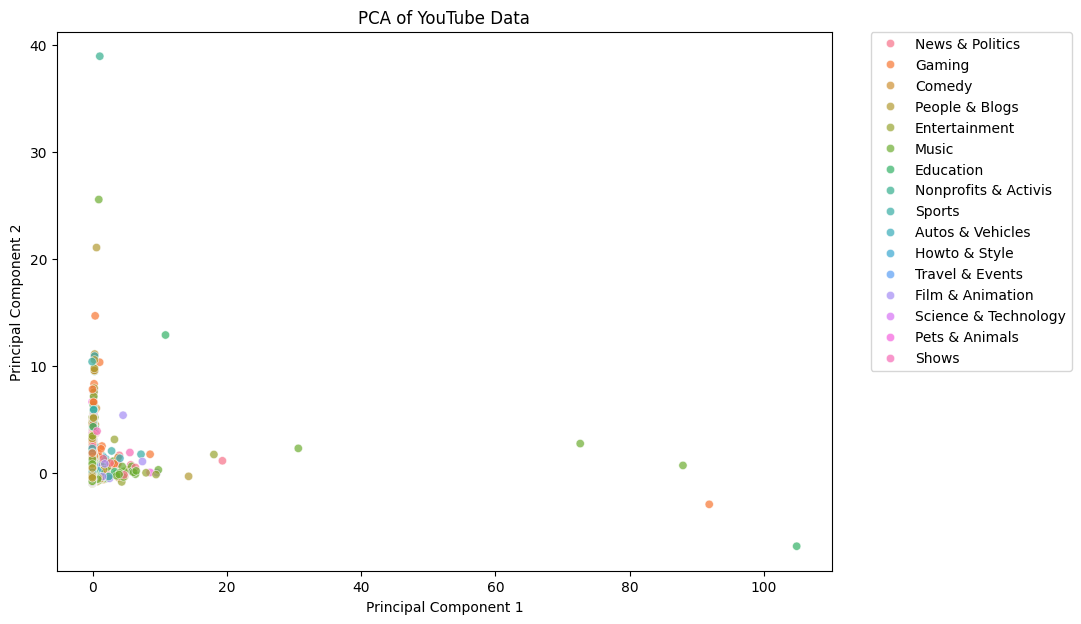

In [6]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='category', data=df_pca_result, alpha=0.7)
plt.title('PCA of YouTube Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()